In [5]:
pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle competitions download Home-Credit-Default-Risk

 99% 683M/688M [00:05<00:00, 132MB/s]
100% 688M/688M [00:05<00:00, 121MB/s]


In [11]:
! unzip Home-Credit-Default-Risk.zip

Archive:  Home-Credit-Default-Risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
bu = pd.read_csv('bureau.csv')
pre = pd.read_csv('previous_application.csv')
cre = pd.read_csv('credit_card_balance.csv')
ins = pd.read_csv('installments_payments.csv')
pos = pd.read_csv('POS_CASH_balance.csv')
test = pd.read_csv('application_test.csv')
train = pd.read_csv('application_train.csv')

In [14]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [31]:
percentage = (ins.isnull().sum()/len(ins))*100
percentage

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NUM_INSTALMENT_VERSION,0.000000
NUM_INSTALMENT_NUMBER,0.000000
DAYS_INSTALMENT,0.000000
DAYS_ENTRY_PAYMENT,0.021352
AMT_INSTALMENT,0.000000
AMT_PAYMENT,0.021352


In [19]:
ins.shape

(13605401, 8)

In [20]:
ins.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


<ipython-input-21-7c154f0d92d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins['DAYS_ENTRY_PAYMENT'])


<Axes: xlabel='DAYS_ENTRY_PAYMENT', ylabel='Density'>

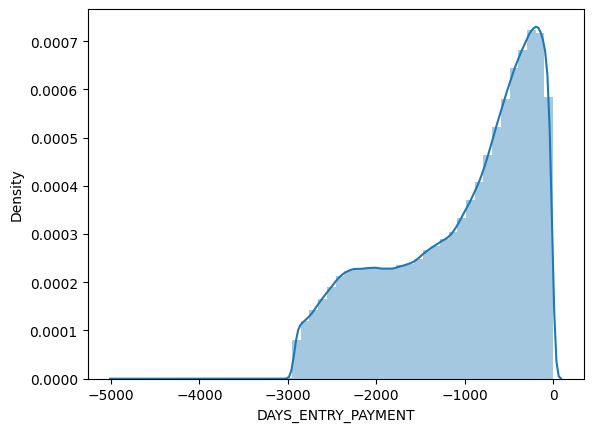

In [21]:
sns.distplot(ins['DAYS_ENTRY_PAYMENT'])

In [32]:
ins['DAYS_ENTRY_PAYMENT'].fillna(ins['DAYS_INSTALMENT'],inplace=True)

In [34]:
ins['AMT_PAYMENT'].fillna(ins['AMT_INSTALMENT'],inplace=True)

In [35]:
ins.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NUM_INSTALMENT_VERSION,0
NUM_INSTALMENT_NUMBER,0
DAYS_INSTALMENT,0
DAYS_ENTRY_PAYMENT,0
AMT_INSTALMENT,0
AMT_PAYMENT,0


In [36]:
ins[ins['SK_ID_CURR'] == 184693]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
55583,2593058,184693,0.0,20,-330.0,-330.0,11063.250,11063.250
125880,2593058,184693,0.0,7,-476.0,-476.0,1793.070,1793.070
201879,2593058,184693,0.0,30,-193.0,-193.0,8384.445,8384.445
273531,2220863,184693,1.0,16,-681.0,-680.0,11102.850,11102.850
...,...,...,...,...,...,...,...,...
3735470,2593058,184693,0.0,8,-451.0,-450.0,2250.000,2250.000
3756874,2234264,184693,2.0,2,-619.0,-619.0,21125.655,38838.780
3756875,2234264,184693,1.0,2,-619.0,-619.0,17713.125,38838.780
3761416,2517632,184693,1.0,8,-1113.0,-1134.0,10332.720,10332.720


In [37]:
ins['INSTALMENT_DELAY'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']

In [38]:
ins

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,INSTALMENT_DELAY
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,-17.0
...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,-1624.0,67.500,67.500,0.0
13605397,1310347,414406,0.0,47,-1539.0,-1539.0,67.500,67.500,0.0
13605398,1308766,402199,0.0,43,-7.0,-7.0,43737.435,43737.435,0.0
13605399,1062206,409297,0.0,43,-1986.0,-1986.0,67.500,67.500,0.0


In [39]:
ins['AMT_PAYMENT_DIFF'] = ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT']

In [40]:
ins

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,INSTALMENT_DELAY,AMT_PAYMENT_DIFF
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,7.0,0.000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,0.000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,0.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,8.0,0.000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,-17.0,-4.455
...,...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,-1624.0,67.500,67.500,0.0,0.000
13605397,1310347,414406,0.0,47,-1539.0,-1539.0,67.500,67.500,0.0,0.000
13605398,1308766,402199,0.0,43,-7.0,-7.0,43737.435,43737.435,0.0,0.000
13605399,1062206,409297,0.0,43,-1986.0,-1986.0,67.500,67.500,0.0,0.000


In [42]:
ins_useful = ins[['SK_ID_CURR','NUM_INSTALMENT_VERSION','INSTALMENT_DELAY','AMT_PAYMENT_DIFF']]

In [43]:
ins_useful

,SK_ID_CURR,NUM_INSTALMENT_VERSION,INSTALMENT_DELAY,AMT_PAYMENT_DIFF
0,161674,1.0,7.0,0.000
1,151639,0.0,0.0,0.000
2,193053,2.0,0.0,0.000
3,199697,1.0,8.0,0.000
4,167756,1.0,-17.0,-4.455
...,...,...,...,...
13605396,428057,0.0,0.0,0.000
13605397,414406,0.0,0.0,0.000
13605398,402199,0.0,0.0,0.000
13605399,409297,0.0,0.0,0.000
